# Rotational equivariance of vector diffusion operator $Q$: 3d plots {-}

In [14]:
import numpy as np
import simple_sinusoidal_vectors as ssv
from importlib import reload
reload(ssv)

# Set parameters
n_vectors = 128
x_axis_increase_rate = 3.0
rotation_angles_list = [(0, 60, 0)]
diffusion_mode = 'wavelets'
diffusion_steps = [1, 2, 4, 8, 16]
k = 10

# Generate a vector field
# vectors, l2_norms, normalized_norms = ssv.generate_sinusoidal_sphere_vectors(
#     n_points=n_points, 
#     x_axis_increase_rate=x_axis_increase_rate
# )

# Load a vector field (and subsample if needed)
vectors = np.load("stanford_bunny_2048_rotated.npy")
if n_vectors > vectors.shape[0]:
    rng = np.random.default_rng(42)
    vectors = rng.choice(vectors, size=n_vectors, replace=False)
l2_norms, normalized_norms = ssv.normalize_vector_norms_for_coloring(vectors)

# Process vector field with diffusions
print("\nProcessing vector field with k-nn graphs and diffusions...")
results = ssv.process_vector_field_with_diffusion(
    vectors, 
    rotation_angles_list, 
    k=k, 
    diffusion_steps=diffusion_steps,
    diffusion_mode=diffusion_mode,
    weighted=False
)

# Extract data for visualization
original_vectors = results['original']['vectors']
rotated_vectors_list = [r['vectors'] for r in results['rotated']]
diffusion_results_list = results['diffusions']


Processing vector field with k-nn graphs and diffusions...


In [16]:
reload(ssv)
save_dir = '/home/davejohnson/Downloads/'
figsize = (len(diffusion_steps) * 4, len(rotation_angles_list) * 6) 

# Visualize everything in a grid
print("\nVisualizing diffusion grid...")
ssv.visualize_diffusion_grid(
    original_vectors, 
    rotated_vectors_list, 
    diffusion_results_list,
    rotation_angles_list,
    diffusion_mode='powers', #'wavelets',
    diffusion_steps=diffusion_steps,
    normalization='auto', #'percentile_per_column',
    figsize=figsize,
    cmap='viridis',
    endpoint_size=4,
    reverse_angles=False,
    fixed_positions=True,
    verbosity=0,
    save_dir=save_dir
)


Visualizing diffusion grid...
Plot saved to: /home/davejohnson/Downloads/diffusion_grid_Q_x_fixed_pos_powers.png


In [4]:
reload(ssv)

ssv.visualize_diffusion_grid(
    original_vectors,
    rotated_vectors_list,
    diffusion_results_list,
    rotation_angles_list,
    diffusion_mode='wavelets',
    diffusion_steps=[0, 1, 2, 4, 8, 16],  # include 0 to define first band as (I-Q)x
    wavelet_color_mode='marginal_to_prev',
    wavelet_color_metric='magnitude',  # or 'directional'
    include_lowpass_column=True,
    figsize=(20, 16),
    cmap='viridis',
    show_labels=False,
    include_unit_sphere=True,
    reverse_angles=True,
    fixed_positions=False,
    operator_symbol='Q',
    vector_symbol='x',
    verbosity=1
)

Computing normalization scale...
  Wavelet columns (magnitude) range: [0.000, 0.145]
  Original field range: [0.151, 0.699] (mean: 0.347)
  Convergence value (Q^16v mean): 0.041
  Convergence position in colormap: -0.20 (0=purple, 0.5=green, 1=yellow)
  Using original field range for consistent color mapping.
Using wavelet magnitude range for consistent color mapping across wavelet columns
Using wavelet magnitude range for consistent color mapping across wavelet columns


## Shape point cloud scratch {-}

In [25]:
import open3d as o3d
import numpy as np
import os

data_dir = '/home/davejohnson/Downloads'

# Try to load the mesh
path = os.path.join(data_dir, "bunny/reconstruction/bun_zipper.ply")
mesh = o3d.io.read_triangle_mesh(path)
if not mesh.has_triangles():
    raise RuntimeError("Failed to load mesh. Check the file path.")

# Normalize scale only if bounds are valid
bbox = mesh.get_max_bound()
max_extent = bbox.max()
if max_extent > 0:
    mesh.scale(1 / max_extent, center=mesh.get_center())

# Sample 2048 points
pcd = mesh.sample_points_uniformly(number_of_points=2048)

# Convert to NumPy
points = np.asarray(pcd.points)

# Save
np.save("stanford_bunny_2048.npy", points)

# Visualize (optional)
o3d.visualization.draw_geometries([pcd])
mesh = o3d.io.read_triangle_mesh(path)
if not mesh.has_triangles():
    raise RuntimeError("Failed to load mesh. Check the file path.")

# Normalize scale only if bounds are valid
bbox = mesh.get_max_bound()
max_extent = bbox.max()
if max_extent > 0:
    mesh.scale(1 / max_extent, center=mesh.get_center())

# Sample 2048 points
pcd = mesh.sample_points_uniformly(number_of_points=2048)

# Visualize (optional)
o3d.visualization.draw_geometries([pcd])

# Convert to NumPy
points = np.asarray(pcd.points)

# Save
np.save("stanford_bunny_2048.npy", points)

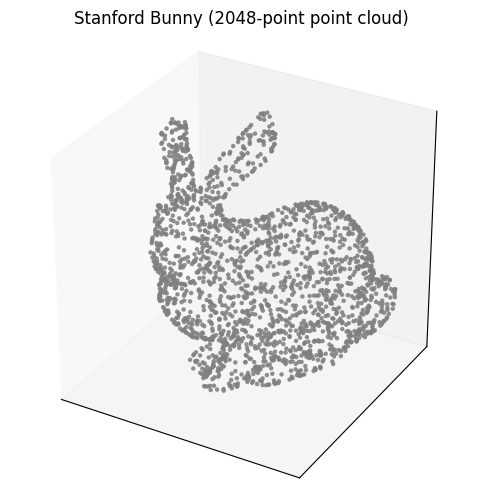

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import simple_sinusoidal_vectors as ssv


angles_of_rotation = [80, 45]
axes_of_rotation = ['x', 'z']

# Load the point cloud
points = np.load("stanford_bunny_2048.npy")  # adjust path if needed

for angle_of_rotation, axis_of_rotation in zip(angles_of_rotation, axes_of_rotation):
    points = ssv.rotate_vectors(points, angle_of_rotation, axis_of_rotation)

# Save the rotated points
np.save("stanford_bunny_2048_rotated.npy", points)

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c='gray', alpha=0.8)

# Set equal aspect ratio for all axes
ax.set_box_aspect([1,1,1])
ax.set_title("Stanford Bunny (2048-point point cloud)")

# Optional: turn off axis ticks for cleaner view
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

